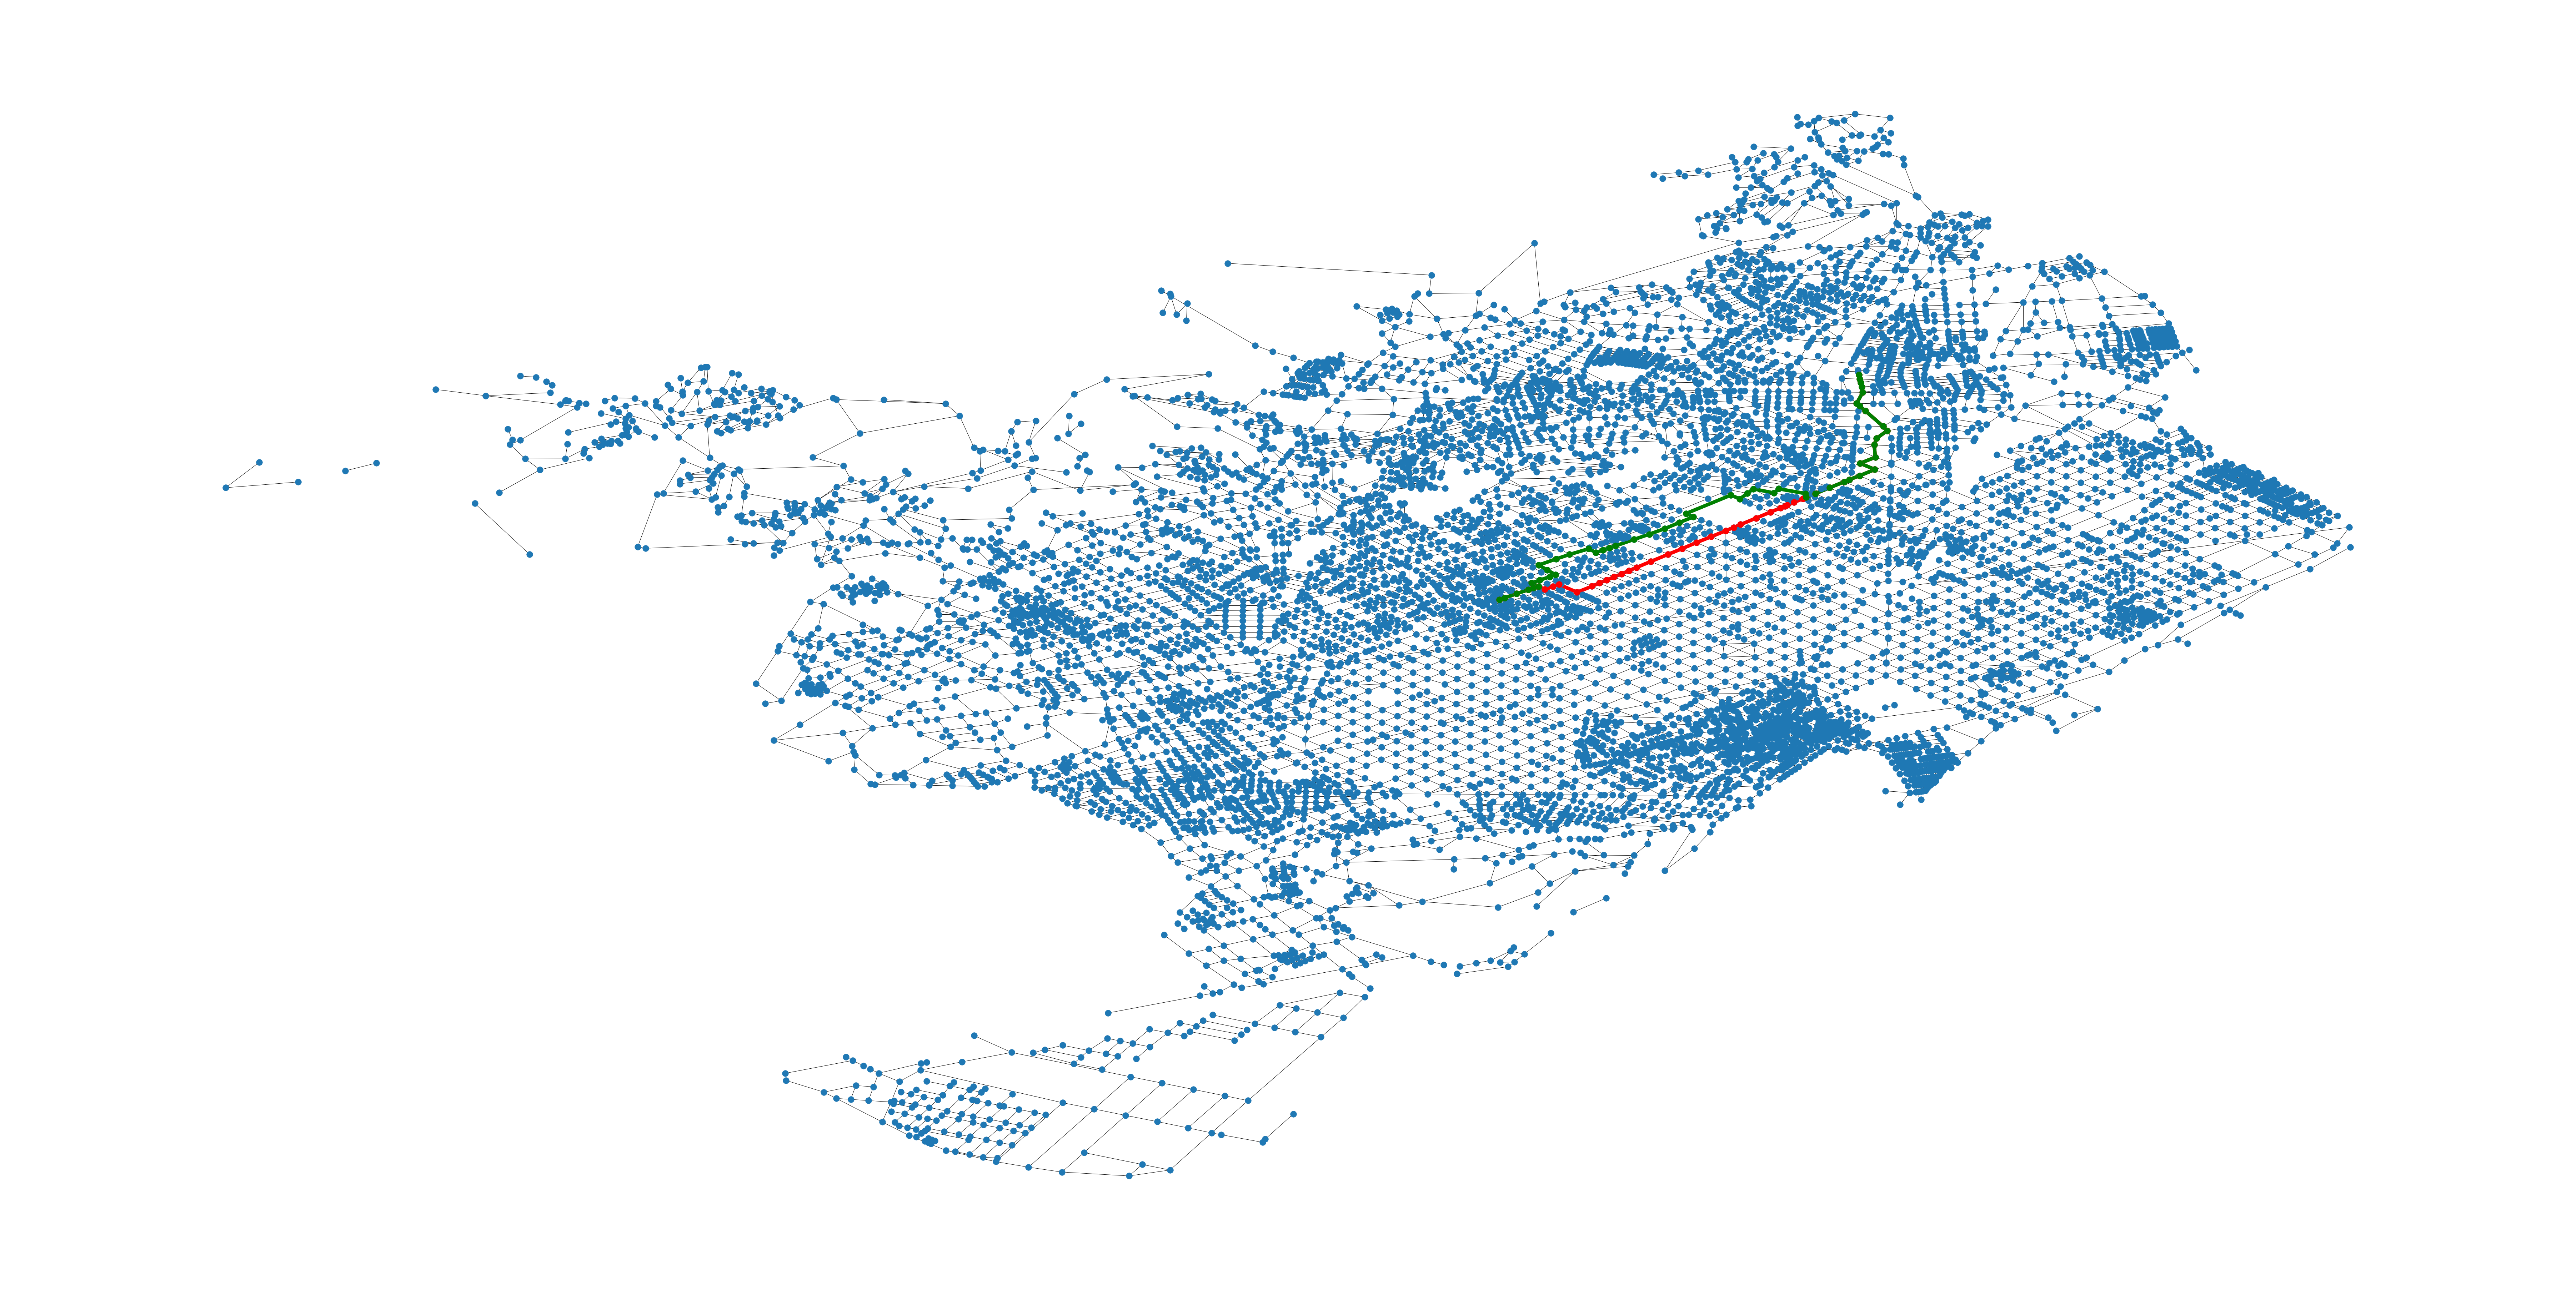

In [9]:
import streamlit as st
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle

edges = pd.read_csv('graph_sample1.csv')
with open('positions.pkl', 'rb') as f:
    positions = pickle.load(f)
G = nx.Graph()

for i, edge in edges.iterrows():
    G.add_edge(edge['FID_x'], edge['FID_y'], weight=edge['Rang'])

st.title('Barcelona green routes')

from_node = 3400
to_node = 4300


path_w = nx.shortest_path(G,from_node,to_node, 'weight')
path = nx.shortest_path(G,from_node,to_node)

path_edges = list(zip(path,path[1:]))
path_edges_w = list(zip(path_w,path_w[1:]))


plt.figure(figsize=[100,50])
nx.draw(G, pos=positions)
nx.draw_networkx_nodes(G,positions,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,positions,edgelist=path_edges,edge_color='r',width=10)

nx.draw_networkx_nodes(G,positions,nodelist=path_w,node_color='g')
nx.draw_networkx_edges(G,positions,edgelist=path_edges_w,edge_color='g',width=10)

plt.show()

In [ ]:
nt = Network('500px', '500px')
nt.from_nx(G)
nt.show('nx.html')